In [10]:
from sklearn import mixture, metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
from manifold_helper import ManifoldHelper

In [2]:
datasetOriginal = pd.read_csv("data/mnist_train.csv")
df = datasetOriginal.copy()
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# separar os rótulos dos dados
label, x = df.iloc[:, :1], df.iloc[:, 1:]
label = label.to_numpy().transpose()[0]
x = x.to_numpy()
label, x

(array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [9]:
# sort de acordo com os labels
idx = np.argsort(label)
label = label[idx]
x = x[idx]
label, x

idx = np.random.RandomState(seed=42).permutation(len(x))
x = x[idx, :]
label = label[idx]

amostras = np.arange(1000, 12001, step=1000)
ari_results = []
time_results = []

manifold = ManifoldHelper()
ari_results_se = []
time_results_se = []

for cut in amostras:
    x_cut = x[:cut, :]
    label_cut = label[:cut]
    print(f'Amostras: {cut}', end='')
    
    t0 = time()
    gmm = mixture.GaussianMixture(n_components=10, random_state=42)
    gmm_predict = gmm.fit(x_cut).predict(x_cut)
    t1 = time()
    
    ari = metrics.adjusted_rand_score(label_cut, gmm_predict)
    t = t1 - t0
    print(f' | Resultado: {ari:.2f} ({t:.1f}s)', end='')
    
    ari_se, t_se = manifold._evaluate_method(x_cut, label_cut, 'SE', 10, 100, n_components=10)
    print(f' | SE: {ari_se:.2f} ({t_se:.1f}s)')
    
    ari_results.append(ari)
    time_results.append(t)
    
    ari_results_se.append(ari_se)
    time_results_se.append(t_se)

Using alternative LTSA.
Amostras: 1000 | Resultado: 0.33 (1.0s) | SE: 0.34 (0.3s)
Amostras: 2000 | Resultado: 0.34 (1.7s) | SE: 0.51 (0.6s)
Amostras: 3000 | Resultado: 0.38 (2.3s) | SE: 0.56 (1.2s)
Amostras: 4000 | Resultado: 0.36 (4.6s) | SE: 0.64 (2.1s)
Amostras: 5000 | Resultado: 0.34 (6.4s) | SE: 0.65 (3.2s)
Amostras: 6000 | Resultado: 0.35 (19.4s) | SE: 0.63 (5.3s)
Amostras: 7000 | Resultado: 0.36 (24.7s) | SE: 0.62 (7.8s)
Amostras: 8000 | Resultado: 0.40 (30.7s) | SE: 0.63 (9.6s)
Amostras: 9000 | Resultado: 0.28 (39.8s) | SE: 0.74 (12.1s)
Amostras: 10000 | Resultado: 0.28 (37.7s) | SE: 0.64 (16.1s)
Amostras: 11000 | Resultado: 0.19 (43.2s) | SE: 0.69 (18.0s)
Amostras: 12000 | Resultado: 0.24 (54.1s) | SE: 0.67 (21.1s)


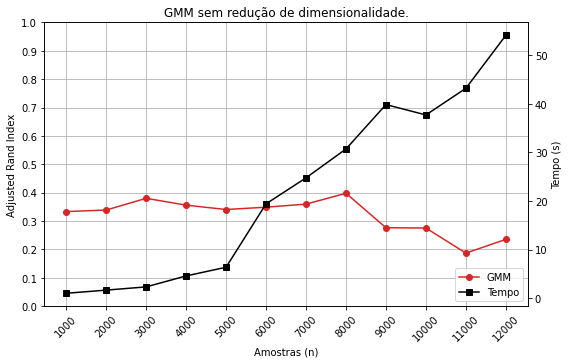

In [104]:
fig, ax1 = plt.subplots(figsize=(8,5))
plt.xticks(amostras, rotation=45, ha='center')

color = 'tab:red'
ax1.set_xlabel('Amostras (n)')
ax1.set_ylabel('Adjusted Rand Index')
ax1.plot(amostras, ari_results, color=color, marker='o', label='GMM')
ax1.tick_params(axis='y')
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.grid()

ax2 = ax1.twinx()
color = '#000000'
ax2.set_ylabel('Tempo (s)')
ax2.plot(amostras, time_results, color=color, marker='s', label='Tempo')
ax2.tick_params(axis='y', labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=4)

fig.tight_layout()
plt.title('GMM sem redução de dimensionalidade.')
plt.show()

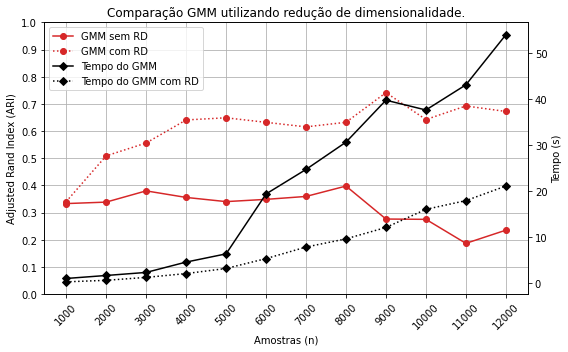

In [105]:
fig, ax1 = plt.subplots(figsize=(8, 5))
plt.xticks(amostras, rotation=45, ha='center')

color = 'tab:red'
ax1.set_xlabel('Amostras (n)')
ax1.set_ylabel('Adjusted Rand Index (ARI)')
ax1.plot(amostras, ari_results, color=color, marker='o', label='GMM sem RD')
ax1.plot(amostras, ari_results_se, color=color, marker='o', label='GMM com RD', linestyle='dotted')
ax1.tick_params(axis='y')
ax1.set_yticks(np.arange(0, 1.01, step=0.1))
ax1.grid()


ax2 = ax1.twinx()
color = '#000000'
ax2.set_ylabel('Tempo (s)')
ax2.plot(amostras, time_results, color=color, marker='D', label='Tempo do GMM')
ax2.plot(amostras, time_results_se, color=color, marker="D", label='Tempo do GMM com RD', linestyle='dotted')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title('Comparação GMM utilizando redução de dimensionalidade.')
fig.tight_layout()
plt.show()

In [108]:
ari_media = np.mean(ari_results)
time_media = np.mean(time_results)
ari_media_se = np.mean(ari_results_se)
time_media_se = np.mean(time_results_se)

print(f'media gmm: {ari_media:.2f}')
print(f'media gmm_SE: {ari_media_se:.2f}')
print(f'dif: {ari_media_se - ari_media:.2f}')

print(f'tempo gmm: {time_media:.2f}')
print(f'tempo gmm_se: {time_media_se:.2f}')
print(f'dif: {time_media_se - time_media:.2f}')

media gmm: 0.32
media gmm_SE: 0.61
dif: 0.29
tempo gmm: 22.13
tempo gmm_se: 8.12
dif: -14.00
